# This notebook is for plotting the results of FP under varying interest rates. Note this is for plotting only. The results come from running FuelPovertyAnalysis.ipynb

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy import interpolate
import seaborn as sns
import copy
from copy import deepcopy
import geopandas as gpd
from matplotlib import rcParams

# Set up the aesthetics for the plot
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['axes.labelsize'] = 14
rcParams['xtick.labelsize'] = 14
rcParams['ytick.labelsize'] = 12

root_path = os.path.join(os.path.dirname(os.getcwd()), 'FuelPoverty_data')

In [2]:
def fp_diff(year, gov):
    rates = [3,4,5,6,7]

    regs = list(np.load(os.path.join(os.getcwd(), "data_for_plot", f"All_fp_estimation_dict2019.npy"), allow_pickle=True).item().keys())

    All_fp_estimation_dict = pd.DataFrame([])
    All_fp_estimation_dict['Reg'] = regs
    for rate in rates:
        res = np.load(os.path.join(os.getcwd(), "data_for_plot", f"All_fp_estimation_dict{year}_rate{rate}{'_gov' if gov else ''}.npy"), allow_pickle=True).item()
        All_fp_estimation_dict[rate] = All_fp_estimation_dict['Reg'].map(res)

    All_fp_estimation_HP_dict = pd.DataFrame([])
    All_fp_estimation_HP_dict['Reg'] = regs
    for rate in rates:
        res = np.load(os.path.join(os.getcwd(), "data_for_plot", f"All_fp_estimation_HP_dict{year}_rate{rate}{'_gov' if gov else ''}.npy"), allow_pickle=True).item()
        All_fp_estimation_HP_dict[rate] = All_fp_estimation_HP_dict['Reg'].map(res)

    All_fp_diff_dict = All_fp_estimation_dict.copy()
    All_fp_diff_dict.iloc[:,1:] = (All_fp_estimation_dict.iloc[:,1:] - All_fp_estimation_HP_dict.iloc[:,1:]) / All_fp_estimation_dict.iloc[:,1:] * 100
    return All_fp_diff_dict

All_fp_diff_dict2019 = fp_diff(year = 2019, gov = False)
All_fp_diff_dict2022 = fp_diff(year = 2022, gov = False)

All_fp_diff_dict2019_gov = fp_diff(year = 2019, gov = True)
All_fp_diff_dict2022_gov = fp_diff(year = 2022, gov = True)

All_fp_diff_dict2019_gov

,Reg,3,4,5,6,7
0,Midlothian,4.381769,4.381769,4.381769,4.381769,4.381769
1,South Lanarkshire,9.196714,9.196714,8.375972,8.375972,8.375972
2,"Edinburgh, City of",9.154283,8.410412,8.410412,8.410412,8.410412
3,Fife,5.195303,5.195303,5.195303,5.195303,4.485225
4,Glasgow City,9.363171,9.363171,8.793743,7.756709,5.782130
5,East Lothian,2.319764,2.319764,2.319764,2.319764,2.319764
6,Angus,11.439672,9.499355,8.364294,8.364294,8.364294
7,Dumfries and Galloway,9.881026,9.881026,9.881026,9.881026,9.881026
8,Aberdeen City,3.259333,3.259333,3.259333,3.259333,3.259333
9,East Dunbartonshire,4.903753,4.903753,4.903753,4.903753,4.903753


[70.73170731707317, 63.41463414634146, 60.97560975609756, 58.536585365853654, 51.21951219512195]
[95.1219512195122, 95.1219512195122, 92.6829268292683, 90.2439024390244, 90.2439024390244]
[85.36585365853658, 80.48780487804879, 73.17073170731707, 65.85365853658537, 65.85365853658537]
[97.5609756097561, 97.5609756097561, 97.5609756097561, 97.5609756097561, 97.5609756097561]


C:\Users\Zhou_Ming\AppData\Local\Temp\ipykernel_36540\3534371860.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), color = 'w', fontsize=1)


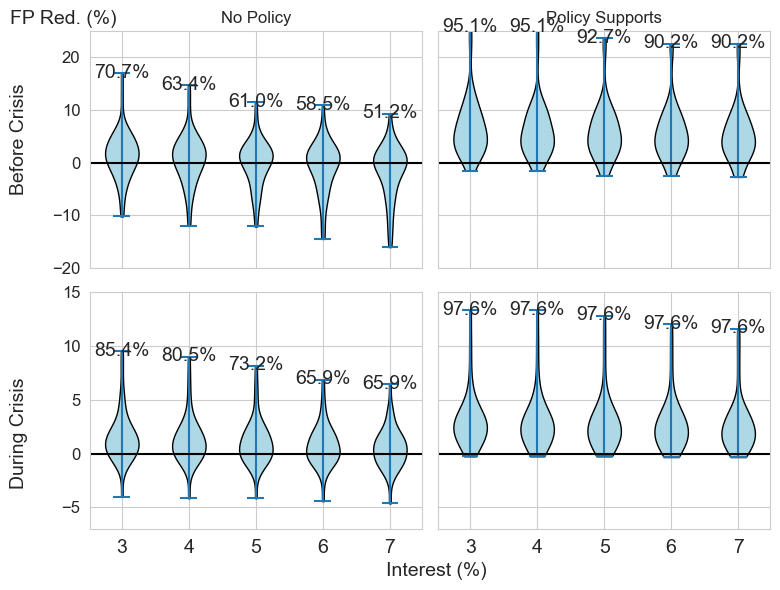

In [3]:
# Create a 2x2 subplot figure
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

# List of DataFrames
dfs = [All_fp_diff_dict2019, All_fp_diff_dict2019_gov, All_fp_diff_dict2022, All_fp_diff_dict2022_gov]


# Set y-limits for each row
y_limits = [(-20, 25), (-7, 15)]

# Iterate over each DataFrame and plot a boxplot in the corresponding subplot
# Loop over each dataframe
for i, df in enumerate(dfs):
    ax = axs[i // 2, i % 2]
    x_values = df.columns[1:]  # Extract the column names for x-axis
    data = [df[x].values for x in x_values]  # Extract the data for each x
    # Create the violin plot
    parts = ax.violinplot(data, showmedians=False)

    # Calculate percentage of mass above 0
    percent_above_zero = [np.sum(x >= 0) / len(x) * 100 for x in data]
    print(percent_above_zero)

    # Display percentage of mass above 0
    for pc, percentage in zip(parts['bodies'], percent_above_zero):
        pc.set_facecolor('lightblue')
        pc.set_edgecolor('black')
        pc.set_alpha(1)
        median_x = np.mean(pc.get_paths()[0].vertices[:, 0])
        max_y = pc.get_paths()[0].vertices[:, 1].max()
        ax.text(median_x, max_y + 0.05, f'{percentage:.1f}%', ha='center', va='center', fontsize=14)

    # Set x-axis labels
    ax.set_xticks(np.arange(1, len(x_values) + 1))
    ax.set_xticklabels(x_values)

    # Set x-axis labels

    if i == 0:
        ax.set_title('No Policy')
    elif i == 1:
        ax.set_title('Policy Supports')
    ax.set_ylim(y_limits[i // 2])  # Set y-limits for each row

    if i in [0, 1]:
        ax.set_xticks(ax.get_xticks(), ax.get_xticks(), color = 'w', fontsize=1)

    if i in [1, 3]:
        ax.set_yticklabels(ax.get_yticks(), color = 'w', fontsize=1)

    ax.axhline(0, color = 'black')

# Set overall title and axis labels
fig.text(-0.0, 0.75, 'Before Crisis', va='center', rotation='vertical', fontsize=14)
fig.text(-0.0, 0.26, 'During Crisis', va='center', rotation='vertical', fontsize=14)

fig.text(-0.0, .95, 'FP Red. (%)', va='center', fontsize=14)

fig.text(0.47, 0.03, 'Interest (%)', va='center', fontsize=14)

# Adjust layout
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.95,
                    top=0.93,
                    wspace=0.05,
                    hspace=0.1)

[70.73170731707317, 63.41463414634146, 60.97560975609756, 58.536585365853654, 51.21951219512195]
[95.1219512195122, 95.1219512195122, 92.6829268292683, 90.2439024390244, 90.2439024390244]
[85.36585365853658, 80.48780487804879, 73.17073170731707, 65.85365853658537, 65.85365853658537]
[97.5609756097561, 97.5609756097561, 97.5609756097561, 97.5609756097561, 97.5609756097561]


C:\Users\Zhou_Ming\AppData\Local\Temp\ipykernel_36540\3347644168.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), color = 'w', fontsize=1)
C:\Users\Zhou_Ming\AppData\Local\Temp\ipykernel_36540\3347644168.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), color = 'w', fontsize=1)


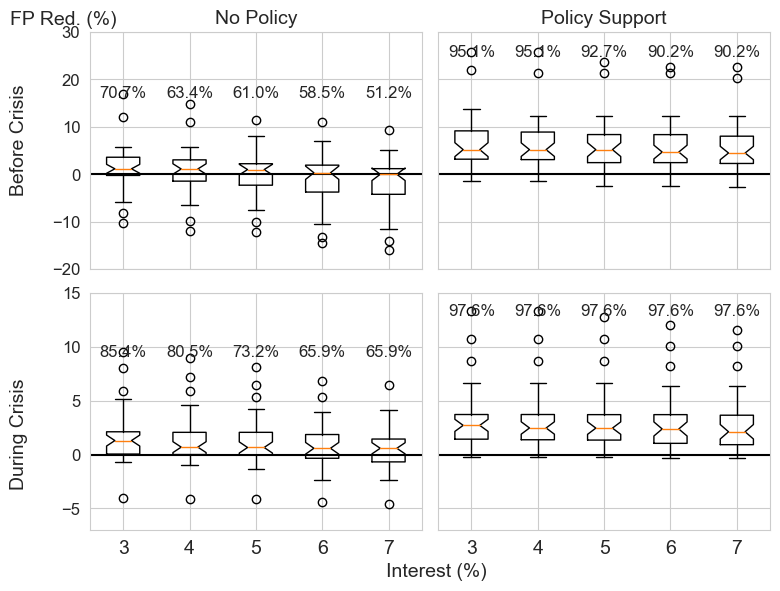

In [4]:
# Create a 2x2 subplot figure
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

# List of DataFrames
dfs = [All_fp_diff_dict2019, All_fp_diff_dict2019_gov, All_fp_diff_dict2022, All_fp_diff_dict2022_gov]


# Set y-limits for each row
y_limits = [(-20, 30), (-7, 15)]

# Iterate over each DataFrame and plot a boxplot in the corresponding subplot
# Loop over each dataframe
for i, df in enumerate(dfs):
    ax = axs[i // 2, i % 2]
    x_values = df.columns[1:]  # Extract the column names for x-axis
    data = [df[x].values for x in x_values]  # Extract the data for each x
    parts = ax.boxplot(data, notch=True)

    # Calculate percentage of mass above 0
    percent_above_zero = [np.sum(x >= 0) / len(x) * 100 for x in data]
    print(percent_above_zero)

    # Display percentage of mass above 0
    for percentage, x in zip(percent_above_zero, range(1, len(x_values) + 1)):
        ax.text(x, np.max(data) + 0.05, f'{percentage:.1f}%', ha='center', va='center', fontsize=12)

    # Set x-axis labels
    ax.set_xticks(np.arange(1, len(x_values) + 1))
    ax.set_xticklabels(x_values)

    # Set x-axis labels

    if i == 0:
        ax.set_title('No Policy', fontsize=14)
    elif i == 1:
        ax.set_title('Policy Support', fontsize=14)
    ax.set_ylim(y_limits[i // 2])  # Set y-limits for each row

    if i in [0, 1]:
        ax.set_xticks(ax.get_xticks(), ax.get_xticks(), color = 'w', fontsize=1)

    if i in [1, 3]:
        ax.set_yticklabels(ax.get_yticks(), color = 'w', fontsize=1)

    ax.axhline(0, color = 'black')

# Set overall title and axis labels
fig.text(-0.0, 0.75, 'Before Crisis', va='center', rotation='vertical', fontsize=14)
fig.text(-0.0, 0.26, 'During Crisis', va='center', rotation='vertical', fontsize=14)

fig.text(-0.0, .95, 'FP Red. (%)', va='center', fontsize=14)

fig.text(0.47, 0.03, 'Interest (%)', va='center', fontsize=14)

# Adjust layout
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.95,
                    top=0.93,
                    wspace=0.05,
                    hspace=0.1)

In [5]:
sns_color = sns.color_palette("rocket", 7).as_hex()[::-1][2:]
sns_color

['#ec4c3e', '#cb1b4f', '#971c5b', '#611f53', '#30173a']

[70.73170731707317, 63.41463414634146, 60.97560975609756, 58.536585365853654, 51.21951219512195]
[95.1219512195122, 95.1219512195122, 92.6829268292683, 90.2439024390244, 90.2439024390244]
[85.36585365853658, 80.48780487804879, 73.17073170731707, 65.85365853658537, 65.85365853658537]
[97.5609756097561, 97.5609756097561, 97.5609756097561, 97.5609756097561, 97.5609756097561]


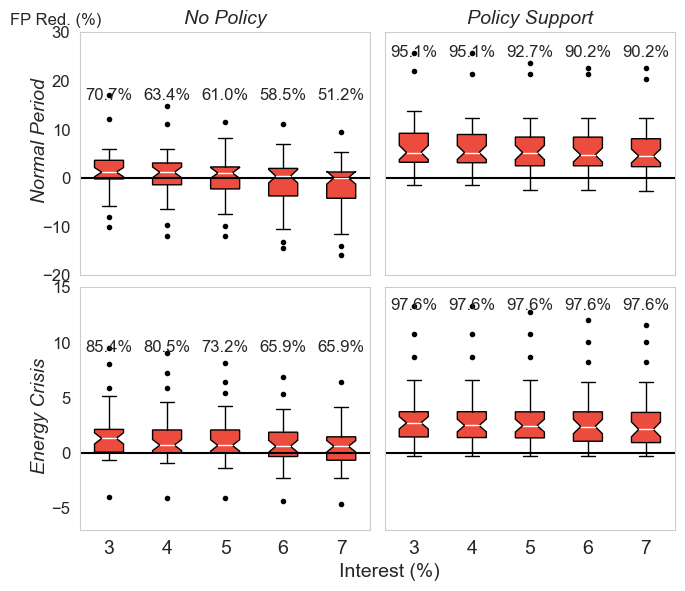

In [9]:
# Create a 2x2 subplot figure
fig, axs = plt.subplots(2, 2, figsize=(7, 6))

# List of DataFrames
dfs = [All_fp_diff_dict2019, All_fp_diff_dict2019_gov, All_fp_diff_dict2022, All_fp_diff_dict2022_gov]


# Set y-limits for each row
y_limits = [(-20, 30), (-7, 15)]

# Define a color palette for the boxes
colors = sns_color

# Iterate over each DataFrame and plot a boxplot in the corresponding subplot
# Loop over each dataframe
for i, df in enumerate(dfs):
    ax = axs[i // 2, i % 2]
    x_values = df.columns[1:]  # Extract the column names for x-axis
    data = [df[x].values for x in x_values]  # Extract the data for each x
    parts = ax.boxplot(data, notch=True, patch_artist=True, sym='k.')

    # Change the color of the boxes to match the color palette
    for patch, color in zip(parts['boxes'], colors):
        patch.set_facecolor(sns_color[0])

    for median in parts['medians']:
        median.set_color('white')

    # Calculate percentage of mass above 0
    percent_above_zero = [np.sum(x >= 0) / len(x) * 100 for x in data]
    print(percent_above_zero)

    # Display percentage of mass above 0
    for percentage, x in zip(percent_above_zero, range(1, len(x_values) + 1)):
        ax.text(x, np.max(data) + 0.05, f'{percentage:.1f}%', ha='center', va='center', fontsize=12)

    # Set x-axis labels
    ax.set_xticks(np.arange(1, len(x_values) + 1))
    ax.set_xticklabels(x_values)

    # Set x-axis labels

    if i == 0:
        ax.set_title('No Policy', fontsize=14, style='italic')
    elif i == 1:
        ax.set_title('Policy Support', fontsize=14, style='italic')
    ax.set_ylim(y_limits[i // 2])  # Set y-limits for each row

    if i in [0, 1]:
        # ax.set_xticks(ax.get_xticks(), ax.get_xticks(), color = 'w', fontsize=1)
        plt.setp(ax.get_xticklabels(), color="white", fontsize=1)

    if i in [1, 3]:
        # ax.set_yticklabels(ax.get_yticks(), color = 'w', fontsize=1)
        plt.setp(ax.get_yticklabels(), color="white", fontsize=1)

    ax.axhline(0, color = 'black')
    # turn off grid
    ax.grid(False)

# Set overall title and axis labels
fig.text(0.03, 0.75, 'Normal Period', va='center', rotation='vertical', fontsize=14, style='italic')
fig.text(0.03, 0.29, 'Energy Crisis', va='center', rotation='vertical', fontsize=14, style='italic')

fig.text(-0.0, .95, 'FP Red. (%)', va='center', fontsize=12)

fig.text(0.47, 0.03, 'Interest (%)', va='center', fontsize=14)

# Adjust layout
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.95,
                    top=0.93,
                    wspace=0.05,
                    hspace=0.05)
plt.savefig(os.path.join(os.getcwd(), "figures", f"sensi_interes.pdf"), dpi = 300)

In [7]:
from scipy.stats import median_test

print("Pre-crisis period, no gov policy, when comparing interest rate = 7% and 3%, the p value is:")
print(median_test(All_fp_diff_dict2019[3].values, All_fp_diff_dict2019[7].values, ties = "ignore").pvalue)

print("Crisis period, no gov policy, when comparing interest rate = 7% and 3%, the p value is:")
print(median_test(All_fp_diff_dict2022[3].values, All_fp_diff_dict2022[7].values, ties = "ignore").pvalue)

Pre-crisis period, no gov policy, when comparing interest rate = 7% and 3%, the p value is:
0.07724423714857807
Crisis period, no gov policy, when comparing interest rate = 7% and 3%, the p value is:
0.37699199323712684


In [8]:
print("Pre-crisis period")
for rate in [3,4,5,6,7]:
    p = median_test(All_fp_diff_dict2019[rate].values, All_fp_diff_dict2019_gov[rate].values, ties = 'ignore').pvalue
    print(f"interest rate {rate}%, p value for gov policy is {p}")

print("Crisis period")
for rate in [3,4,5,6,7]:
    p = median_test(All_fp_diff_dict2022[rate].values, All_fp_diff_dict2022_gov[rate].values, ties = 'ignore').pvalue
    print(f"interest rate {rate}%, p value for gov policy is {p}")

Pre-crisis period
interest rate 3%, p value for gov policy is 0.0019875744789215146
interest rate 4%, p value for gov policy is 9.995948132466275e-06
interest rate 5%, p value for gov policy is 9.995948132466275e-06
interest rate 6%, p value for gov policy is 9.332230546775573e-09
interest rate 7%, p value for gov policy is 1.5663312921022176e-09
Crisis period
interest rate 3%, p value for gov policy is 0.0019875744789215146
interest rate 4%, p value for gov policy is 0.0019875744789215146
interest rate 5%, p value for gov policy is 0.00804068467251673
interest rate 6%, p value for gov policy is 0.0019875744789215146
interest rate 7%, p value for gov policy is 0.0004096172279005813
